# Airbnb

## Step 1: Problem statement and data collection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
airbnb = pd.read_csv("/workspaces/machine-learning-python-template/data/raw/AB_NYC_2019.csv")

## Step 2: Exploration and data cleaning

In [4]:
# Obtain dimensions
airbnb.shape

(48895, 16)

In [5]:
# Obtain information about data types and non-null values
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

-There are a total of 48.895 rows (in this case, cars) and 16 columns, among which we find the target or class to predict, price.

-The variables last_review and reviews_per_month has null values, but in a smaller number. The rest of the variables always have a value.

-The data has 10 numerical characteristics and 6 categorical characteristics.

### Eliminate duplicates

In [6]:
airbnb.drop("id", axis=1).duplicated().sum()
airbnb.shape

(48895, 16)

In [7]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Eliminate irrelevant information

In [8]:
airbnb.drop(["id", "name", "host_id", "host_name", "neighbourhood", "last_review", "number_of_reviews", "reviews_per_month"],axis =1, inplace=True)

airbnb.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,1,0


## Step 3: Analysis of univariate variables

### Analysis on categorical variables

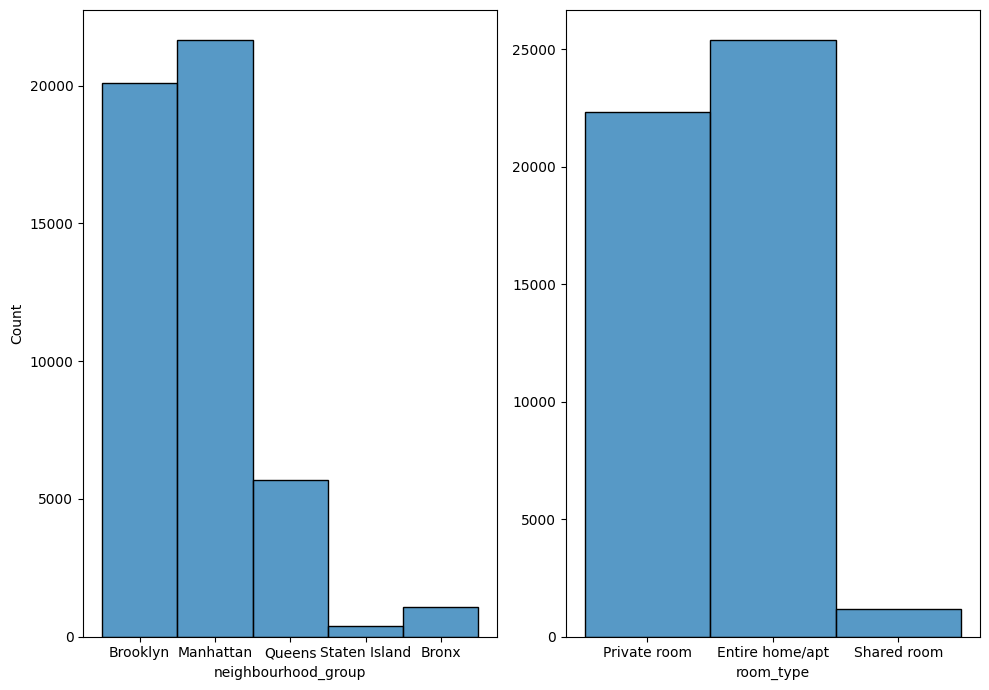

In [9]:
fig, axis = plt.subplots(1, 2, figsize= (10, 7))
	
# Create a multiple histogram
sns.histplot(ax = axis[0], data = airbnb, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = airbnb, x = "room_type").set(ylabel = None)


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

We can observe on the graph of neighbourhood_group that Manhattan has the most host places, followed by Brooklyn. The neighborhood with the fewest host places is Staten Island.

On the graph of room_type, we observe that there are more Entire home/apartment listings than Shared rooms, with a significant difference."

### Analysis on numeric variables

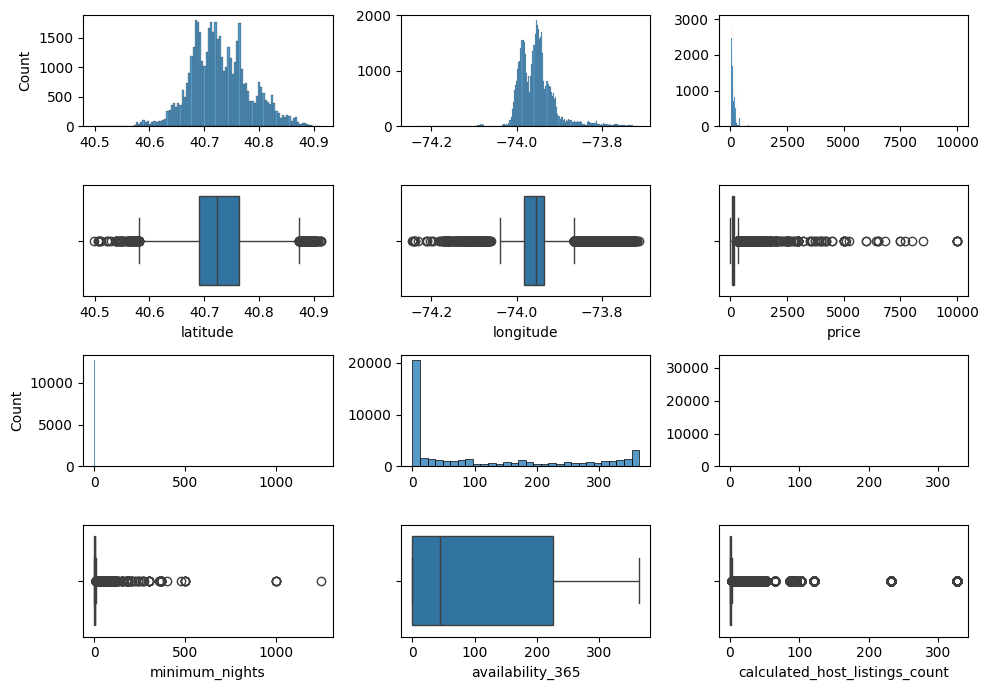

In [10]:
fig, axis = plt.subplots(4, 3, figsize= (10, 7))

sns.histplot(ax = axis[0, 0], data = airbnb, x = "latitude").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = airbnb, x = "latitude")
sns.histplot(ax = axis[0, 1], data = airbnb, x = "longitude").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = airbnb, x = "longitude")
sns.histplot(ax = axis[0, 2], data = airbnb, x = "price").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = airbnb, x = "price")
sns.histplot(ax = axis[2, 0], data = airbnb, x = "minimum_nights").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = airbnb, x = "minimum_nights")
sns.histplot(ax = axis[2, 1], data = airbnb, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = airbnb, x = "availability_365")
sns.histplot(ax = axis[2, 2], data = airbnb, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = airbnb, x = "calculated_host_listings_count")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

We can observe that the graphs of latitude and longitude are not symmetrical but tend towards a normal distribution, where the median approaches the mode. In contrast, regarding the graphs of price, minimum_nights, and availability 365, we notice a left-skewed distribution, where the mode is below the median. Moreover, the graph of calculated_host_listings_count presents numerous dispersed values that require further evaluation

## Step 4: Analysis of multivariate variables

### Numerical-numerical analysis

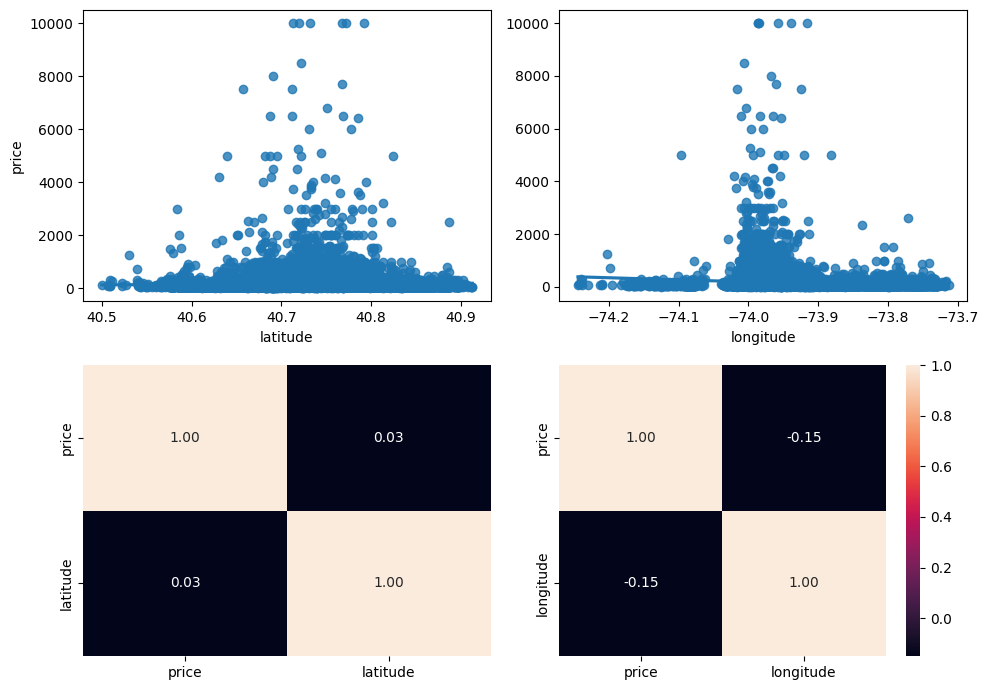

In [11]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = airbnb, x = "latitude", y = "price")
sns.heatmap(airbnb[["price", "latitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = airbnb, x = "longitude", y = "price").set(ylabel=None)
sns.heatmap(airbnb[["price", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In these graphs, we can observe that there is no correlation between price and latitude or price and longitude. However, we can visualize how they seem to form an asymmetric normal distribution.

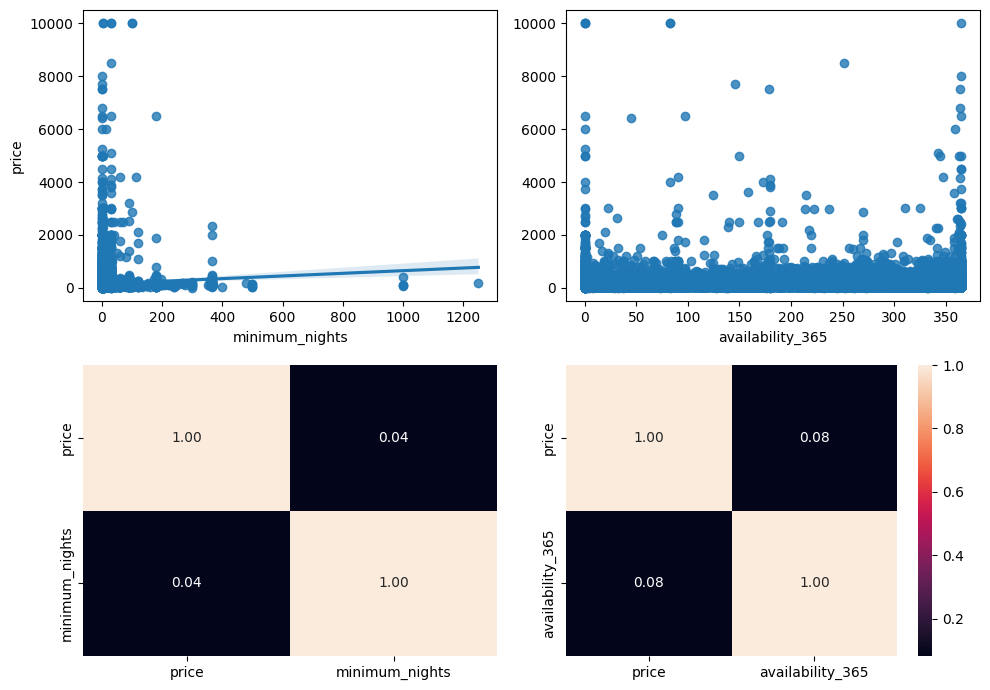

In [12]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = airbnb, x = "minimum_nights", y = "price")
sns.heatmap(airbnb[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = airbnb, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(airbnb[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Here we can observe that there is no correlation between the price and the availability days or minimum nights.

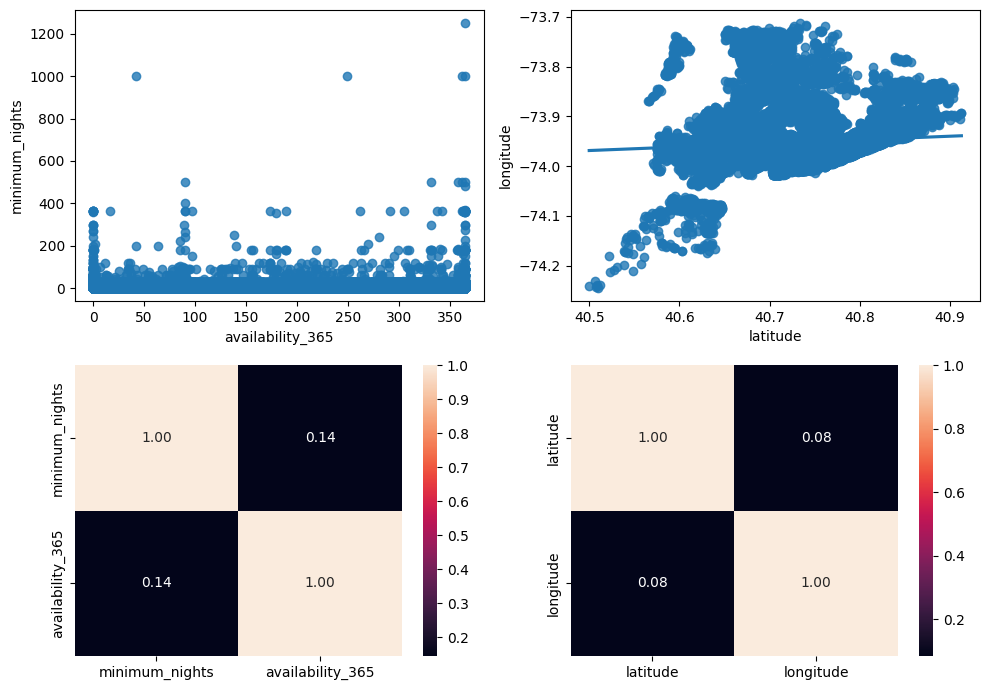

In [13]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = airbnb, x = "availability_365", y = "minimum_nights")
sns.heatmap(airbnb[["minimum_nights", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0])
sns.regplot(ax = axis[0, 1], data = airbnb, x = "latitude", y = "longitude")
sns.heatmap(airbnb[["latitude", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()

# Show the plot
plt.show()

In the first graph, we can see that there is no correlation between minimum_nights and availability_365. In the second one, we also don't observe a correlation, but by creating a scatter plot with longitude and latitude, we can generate a visualization resembling a map.

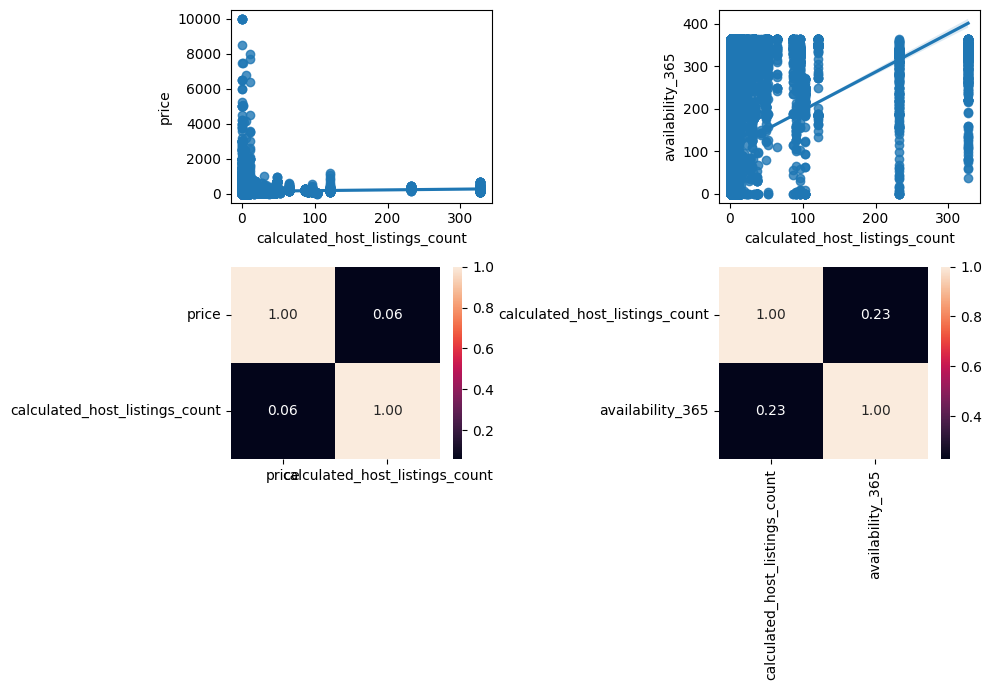

In [14]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = airbnb, x = "calculated_host_listings_count", y = "price")
sns.heatmap(airbnb[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0])
sns.regplot(ax = axis[0, 1], data = airbnb, x = "calculated_host_listings_count", y = "availability_365")
sns.heatmap(airbnb[["calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()

# Show the plot
plt.show()

In the first graph, we observe that there is no correlation between price and calculated_host_listings_count. In the second graph, we observe that there is no strong correlation between availability_365 and calculated_host_listings_count.

### Categorical-categorical analysis

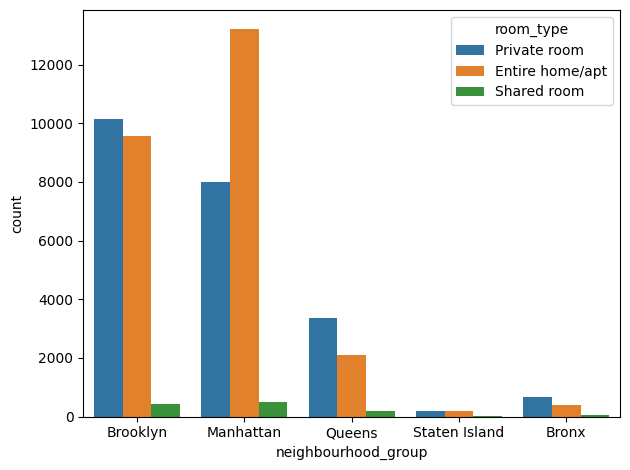

In [15]:

sns.countplot(data = airbnb, x = "neighbourhood_group", hue = "room_type")

plt.tight_layout()

plt.show()

We can observe that in Manhattan, there are more entire home/apartment listings than in the other boroughs. Brooklyn, on the other hand, has a higher number of private room listings. Additionally, Staten Island has the fewest number of listings among the neighborhood groups

### Combinations of class with various predictors.

In [16]:
#['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'] = [0, 1, 2, 3, 4]
airbnb["neighbourhood_group"] = airbnb["neighbourhood_group"].factorize()[0]

#['Private room', 'Entire home/apt', 'Shared room'] = [0, 1, 2]
airbnb["room_type"] = airbnb["room_type"].factorize()[0]

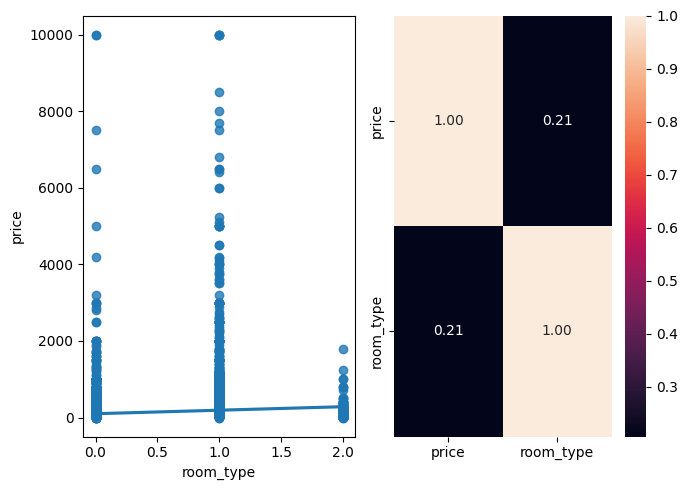

In [17]:
fig, axis = plt.subplots(1, 2, figsize = (7, 5))

sns.regplot(ax = axis[0], data = airbnb, x = "room_type", y = "price")
sns.heatmap(airbnb[["price", "room_type"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

plt.tight_layout()

# Show the plot
plt.show()

In this graph, we can observe that the correlation between the price and room types is very low.

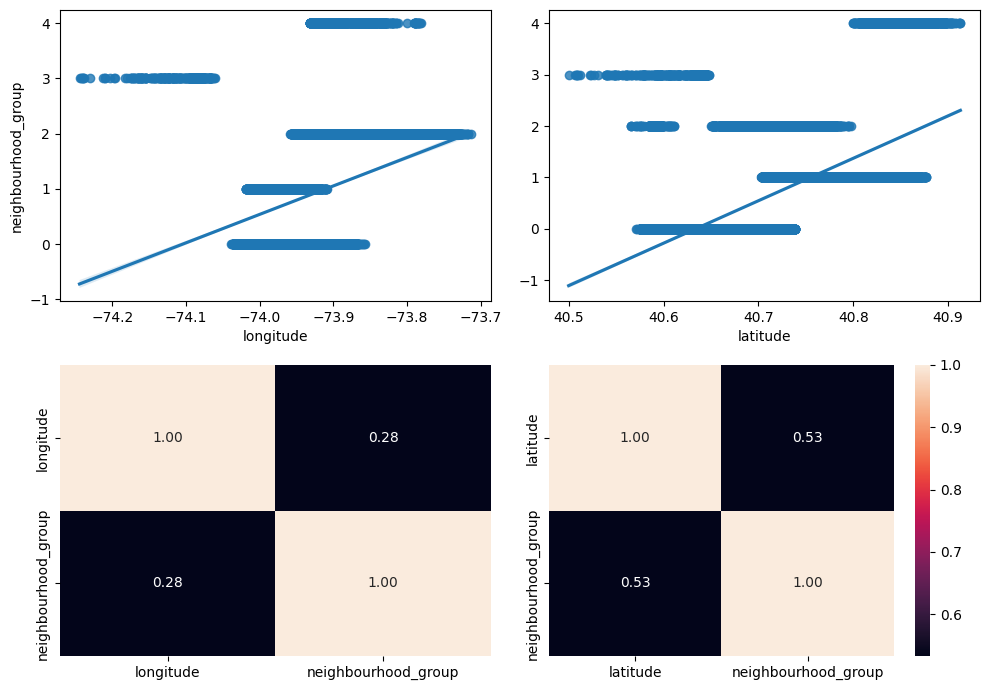

In [18]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = airbnb, x = "longitude", y = "neighbourhood_group")
sns.heatmap(airbnb[["longitude", "neighbourhood_group"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = airbnb, x = "latitude", y = "neighbourhood_group").set(ylabel=None)
sns.heatmap(airbnb[["latitude", "neighbourhood_group"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In these graphics, we can observe that neighborhood_groups correlation with longitude is not very strong, but neighborhood_groups show correlation with latitude

## Correlation analysis

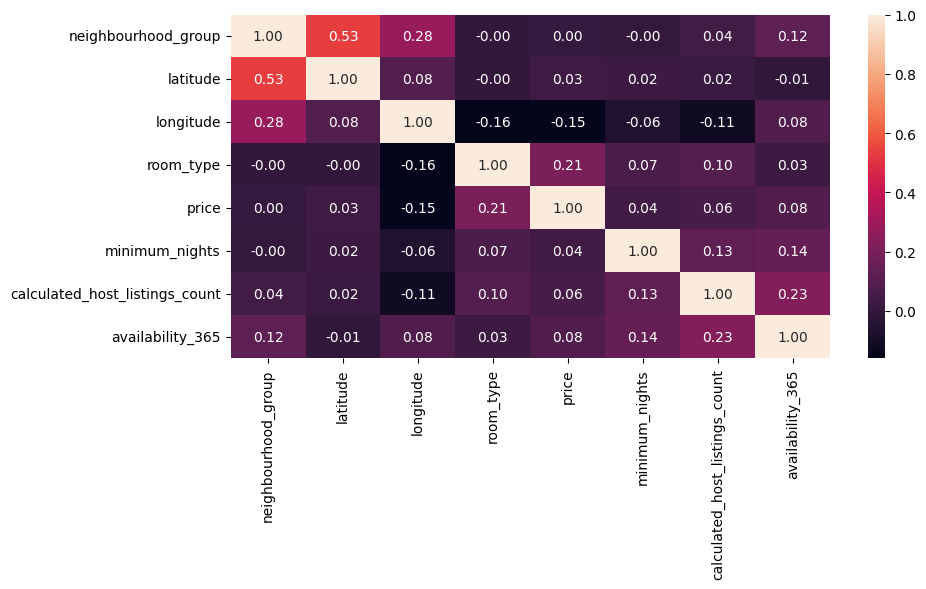

In [19]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(airbnb.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

With this heat map, we can observe the correlations with each variable, with the strongest being Latitude with Neighbourhood_group.

We notice low correlation between Longitude with Neighbourhood_group, calculated_host_listings_count with availability_365, and price with room_type.

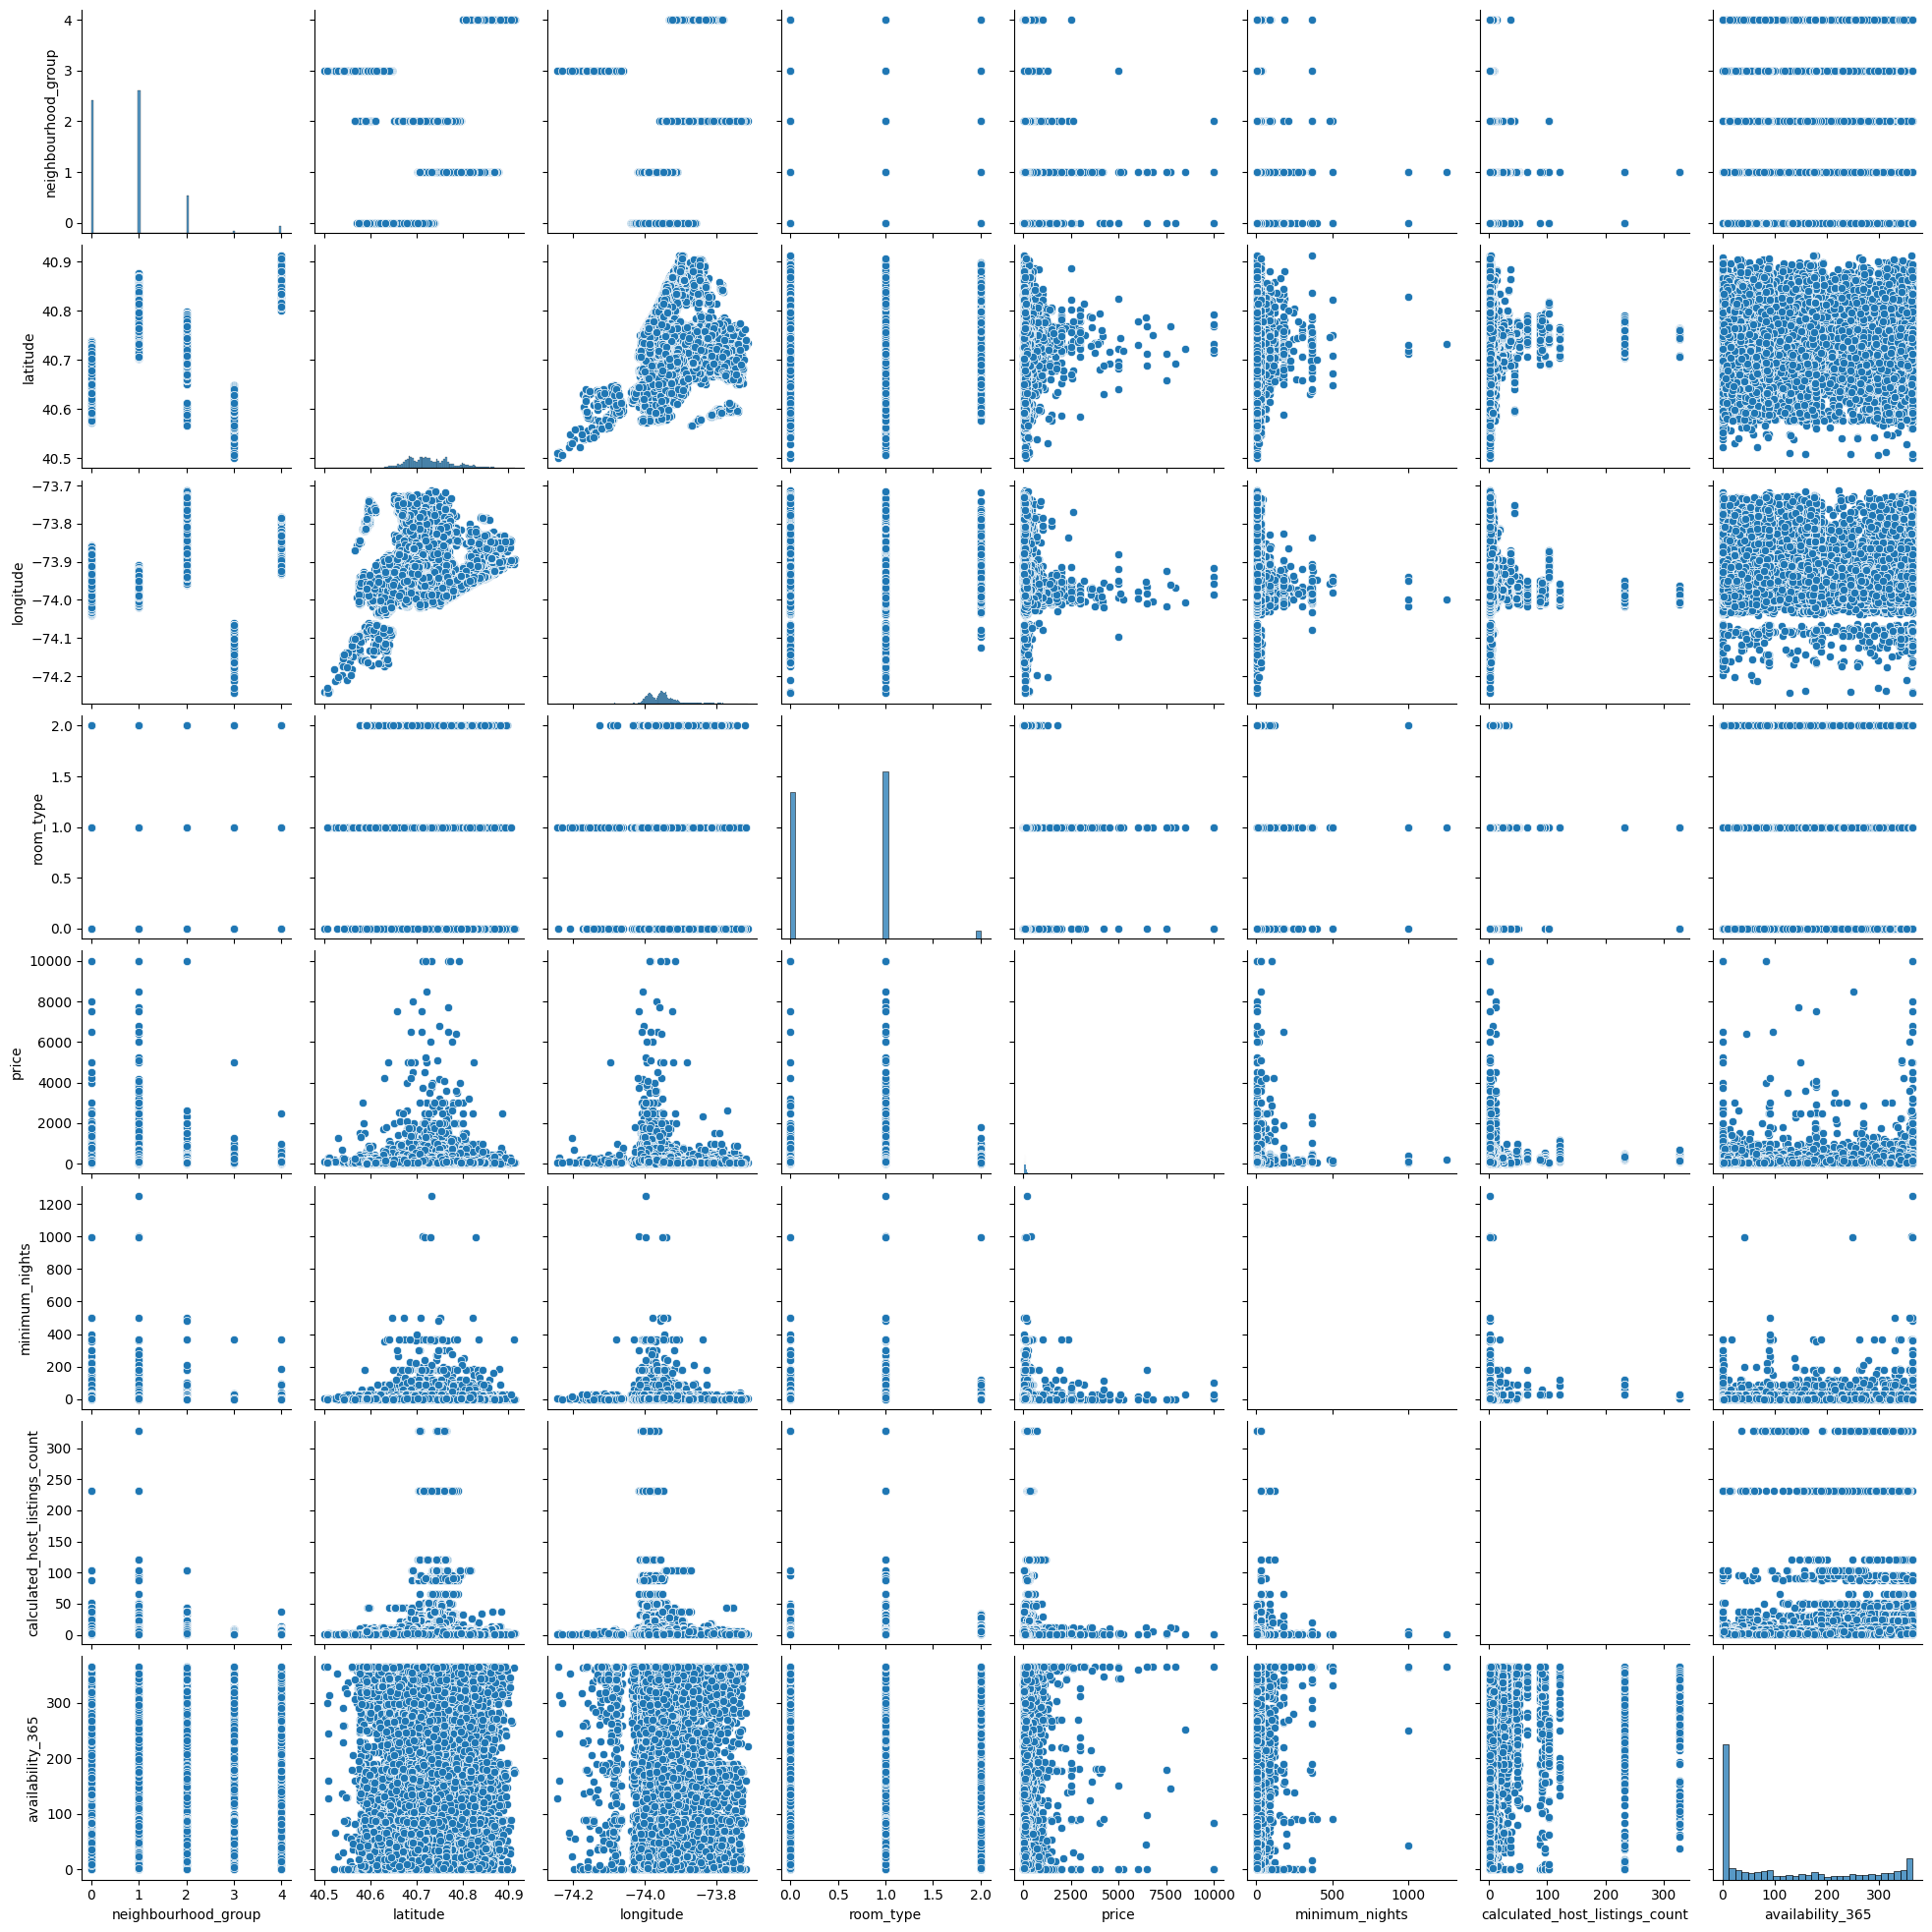

In [20]:
sns.pairplot(data = airbnb)

## Step 5: Feature engineering

#### Outlier analysis

In [21]:
airbnb.describe()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,40.728949,-73.952170,0.567113,152.720687,7.029962,7.143982,112.781327
std,0.844386,0.054530,0.046157,0.541249,240.154170,20.510550,32.952519,131.622289
min,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,0.000000
50%,1.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,1.000000,45.000000
75%,1.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,2.000000,227.000000
max,4.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,327.000000,365.000000


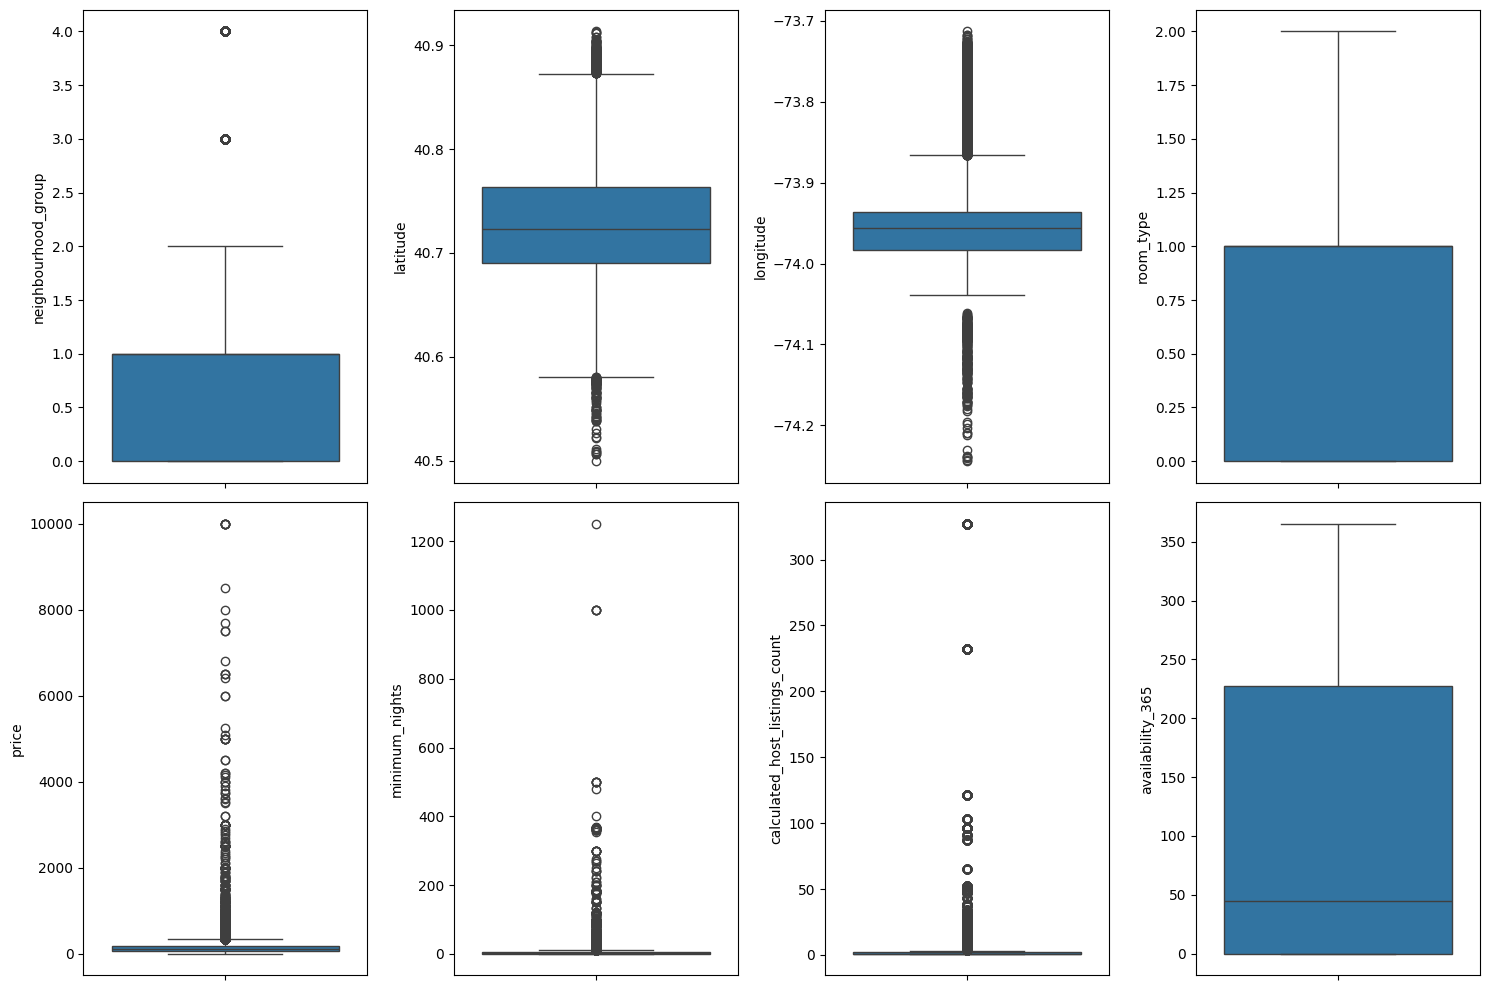

In [22]:
fig, axis = plt.subplots(2, 4, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = airbnb, y = "neighbourhood_group")
sns.boxplot(ax = axis[0, 1], data = airbnb, y = "latitude")
sns.boxplot(ax = axis[0, 2], data = airbnb, y = "longitude")
sns.boxplot(ax = axis[0, 3], data = airbnb, y = "room_type")
sns.boxplot(ax = axis[1, 0], data = airbnb, y = "price")
sns.boxplot(ax = axis[1, 1], data = airbnb, y = "minimum_nights")
sns.boxplot(ax = axis[1, 2], data = airbnb, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 3], data = airbnb, y = "availability_365")


plt.tight_layout()

plt.show()

In [23]:
airbnb[airbnb["price"] == 0].shape

(11, 8)

In [24]:
airbnb.drop(airbnb[airbnb["price"] == 0].index, axis = 0, inplace = True)

In [25]:
minimum_nights_stats = airbnb["minimum_nights"].describe()
minimum_nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [26]:
minimum_nights_stats = airbnb["minimum_nights"].describe()
minimum_nights_iqr = minimum_nights_stats['75%'] - minimum_nights_stats['25%']
upper_limit = minimum_nights_stats['75%'] + 1.5 * minimum_nights_iqr
lower_limit = minimum_nights_stats['25%'] - 1.5 * minimum_nights_iqr

print(f"The upper and lower limits for detecting outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(minimum_nights_iqr, 2)}")

The upper and lower limits for detecting outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [27]:
airbnb[airbnb["minimum_nights"] > 11].shape

(6605, 8)

I'm keeping the outliers

In [28]:
calculated_host_listings_count_stats = airbnb["calculated_host_listings_count"].describe()
calculated_host_listings_count_stats

count    48884.000000
mean         7.144628
std         32.956185
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [29]:
calculated_host_listings_count_stats = airbnb["calculated_host_listings_count"].describe()
calculated_host_listings_count_iqr = calculated_host_listings_count_stats['75%'] - calculated_host_listings_count_stats['25%']
upper_limit = calculated_host_listings_count_stats['75%'] + 1.5 * calculated_host_listings_count_iqr
lower_limit = calculated_host_listings_count_stats['25%'] - 1.5 * calculated_host_listings_count_iqr

print(f"The upper and lower limits for detecting outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(calculated_host_listings_count_iqr, 2)}")

The upper and lower limits for detecting outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [30]:
airbnb[airbnb["calculated_host_listings_count"] > 3.5].shape

(7073, 8)

I'm keeping the outliers

#### Missing value analysis

In [31]:
airbnb.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Inference of new features

I'm not making any inferences in this dataset.

### Feature scaling

#### Divide the dataset

In [32]:
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = airbnb.drop("price", axis = 1)
y = airbnb["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

X_train.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365
16861,0,40.70353,-73.93440,0,2,1,0
26143,1,40.81643,-73.94042,0,3,1,205
8711,0,40.68623,-73.96755,1,30,1,0
4443,0,40.64638,-73.97723,1,7,1,31
2873,1,40.76866,-73.95360,1,6,1,71


Normalization, Min-Max Scaling or ...

In [33]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["neighbourhood_group", "latitude", "longitude", "room_type", "minimum_nights", "calculated_host_listings_count", "availability_365"]

scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)

scal_features_train = scaler.transform(X_train)
scal_features_test = scaler.transform(X_test)

X_train_scal = pd.DataFrame(scal_features_train, index = X_train.index, columns = num_variables)
X_test_scal = pd.DataFrame(scal_features_test, index = X_test.index, columns = num_variables)


X_train_scal.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365
16861,0.00,0.483891,0.596569,0.0,0.002004,0.0,0.000000
26143,0.25,0.761983,0.584926,0.0,0.004008,0.0,0.561644
8711,0.00,0.441278,0.532454,0.5,0.058116,0.0,0.000000
4443,0.00,0.343120,0.513732,0.5,0.012024,0.0,0.084932
2873,0.25,0.644317,0.559434,0.5,0.010020,0.0,0.194521


## Step 6: Feature selection

In [34]:
from sklearn.feature_selection import f_regression, SelectKBest

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

X_train_sel.head()

,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,price
0,0.596569,0.0,0.002004,0.0,0.000000,55
1,0.584926,0.0,0.004008,0.0,0.561644,65
2,0.532454,0.5,0.058116,0.0,0.000000,220
3,0.513732,0.5,0.012024,0.0,0.084932,499
4,0.559434,0.5,0.010020,0.0,0.194521,140


In [35]:
X_test_sel.head()

,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,price
0,0.534852,0.5,0.000000,0.0,0.000000,120
1,0.458262,0.0,0.000000,0.0,0.654795,90
2,0.540422,0.5,0.004008,0.0,0.295890,100
3,0.161960,0.0,0.000000,0.0,1.000000,200
4,0.476462,0.5,0.004008,0.0,0.002740,170


In [37]:
X_train_sel.to_csv("/workspaces/machine-learning-python-template/data/raw/airbnb_train.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-python-template/data/raw/airbnb_test.csv", index=False)